In [0]:
import numpy as np
import matplotlib.pyplot as plt
import readligo as rl
from math import sin, cos, pi, radians

In [0]:
events_dict = {# "event_name": ("template_filename", inclination, luminosity_distance)
    "gw170817": ("generated waveforms/GW170817.csv", radians(175), 40),
    "gw170817_seo": ("generated waveforms/GW170817_neq_seo.csv", radians(166), 45), # new inclination and distance from https://arxiv.org/pdf/1805.11579.pdf caption of table III
    "gw170608_seo": ("generated waveforms/GW170608_neq_seo.csv", radians(0), 340),
    "gw170814_seo": ("generated waveforms/GW170814_neq_seo.csv", radians(0), 540)
}
event="gw170814_seo"
template_filename, inclination, luminosity_distance = events_dict[event]


distance_unit = 420 #MPc (i.e. GW150914 distance)
strain_mult = 1.0*10**18 * distance_unit / luminosity_distance # strain decreases linearly with distance
time_mult = 2500


start_time = -0.090
end_time = 0.018
time_step = 0.0005#0.0002

In [0]:
template_ts=[]
template_p=[]
template_c=[]
with open(template_filename) as f:
    for line in f:
        t,p,c = line.split(",")
        template_ts.append(float(t))
        template_p.append(float(p))
        template_c.append(float(c))

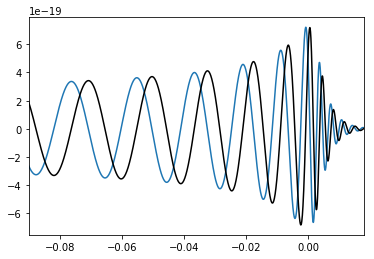

In [0]:
plt.figure()
plt.plot(template_ts,template_p,template_ts,template_c,'k',label='template')
plt.xlim([start_time,end_time])
plt.show()

In [0]:
last_time=-10
print_strains_p=[]
print_strains_c=[]
print_times=[]
for (t,p,c) in zip(template_ts, template_p, template_c):
    if end_time >= t >= start_time and t - last_time >= (time_step if t < -0.03 else 0.0001):
        print_strains_p.append(p)
        print_strains_c.append(c)
        print_times.append(t)
        last_time=t

In [0]:
# scale the strains and take into account the inclination (angle between orbital angular momentum of source and line of sight)
scaled_strains_p = [s * strain_mult * (1+cos(inclination)**2) / 2 for s in print_strains_p]
scaled_strains_c = [s * strain_mult * cos(inclination) for s in print_strains_c]

print_times = [(t - print_times[0]) * time_mult for t in print_times]

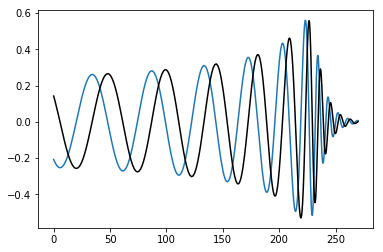

In [0]:
plt.figure()
plt.plot(print_times,scaled_strains_p,print_times,scaled_strains_c,'k',label='print_strains')
plt.autoscale(True)
plt.show()

In [0]:
with open(f"strains_polarization_{event}.csv", "w") as f:
    for t,p,c in zip(print_times, scaled_strains_p, scaled_strains_c):
        f.write(f"{t}, {p}, {c}\n")